In [125]:
!unzip "Week07_assignment - dataset fraud detection"

unzip:  cannot find or open Week07_assignment - dataset fraud detection, Week07_assignment - dataset fraud detection.zip or Week07_assignment - dataset fraud detection.ZIP.


In [126]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

In [127]:
# data load function
def readCombineCsv(directory):
    train = []
    test = []
    train_label = []
    test_label = []
    for filename in sorted(os.listdir(directory)):
      filename_tokens = filename.split('.')
      data_type, data_func = filename_tokens[3], filename_tokens[4]
      if data_func == 'Inputs':
        data = pd.read_csv(directory + '/' + filename)
        train.append(data) if data_type == 'Train' else test.append(data)
      else:
        data = pd.read_csv(directory + '/' + filename, names=['label'])
        train_label.append(data) if data_type == 'Train' else test_label.append(data)

    train = pd.concat(train, axis=0, ignore_index=True)
    train_label = pd.concat(train_label, axis=0, ignore_index=True)
    test = pd.concat(test, axis=0, ignore_index=True)
    test_label = pd.concat(test_label, axis=0, ignore_index=True)
    return train, test, train_label, test_label

In [128]:
# load data
X_train, X_test, y_train, y_test = readCombineCsv('fraud_detection')

display(X_train.head())
display(y_train.head())

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
0,12.95,0,CA,925,3,AOL.COM,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1
1,11.01,0,CA,925,3,AOL.COM,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1
2,38.85,0,CA,928,3,HOTMAIL.COM,1,0,0,38.85,2602,21,1,0,0,0,0,0,1
3,25.90,0,NJ,77,0,AOL.COM,1,0,0,25.90,4139,6,0,0,0,1,1,0,1
4,12.95,0,CA,945,3,YAHOO.COM,0,0,1,12.95,3826,9,1,0,0,1,0,0,1


,label
0,0
1,0
2,0
3,0
4,0


In [129]:
frauds_idx = y_train.loc[y_train["label"] != 0]
y_train.value_counts()

label
0        833292
1         18846
dtype: int64

In [130]:
# Exploratory Data Analysis
X_train.describe()

,amount,hour1,zip1,field1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
count,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000,852138.000000
mean,25.635312,13.864726,543.243742,2.419203,0.425561,13.875858,0.546989,25.626179,714.512653,13.984115,1.375689,0.113306,0.018367,0.541127,0.401185,0.019888,6.176676
std,14.190418,5.263208,315.372321,1.003756,0.494428,5.258313,0.497787,14.198695,3919.306679,6.516820,2.423930,0.316966,0.134274,0.498306,0.490139,0.139614,102.976960
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-32265.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.950000,10.000000,282.000000,2.000000,0.000000,11.000000,0.000000,12.950000,-1551.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,25.900000,14.000000,530.000000,3.000000,0.000000,14.000000,1.000000,25.900000,1455.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,38.850000,18.000000,891.000000,3.000000,1.000000,18.000000,1.000000,38.850000,3598.000000,19.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,95.400000,23.000000,999.000000,4.000000,1.000000,23.000000,1.000000,95.400000,8193.000000,46.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3278.000000


In [131]:
# !pip3 pandas-profiling[notebook]

# import pandas_profiling 

# pandas_profiling.ProfileReport(X_train)

0    833292
1     18846
Name: label, dtype: int64


<AxesSubplot:>

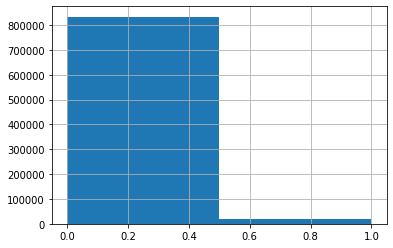

In [132]:
print(y_train.label.value_counts())
y_train.label.hist(bins=2)

In [133]:
# Merge data & label for preprocessing
data_train = X_train.join(pd.get_dummies(y_train))
data_test = X_test.join(pd.get_dummies(y_test))
print('Original data train length: ', len(data_train))
print('Original data test length: ', len(data_test))

Original data train length:  852138
Original data test length:  94682


In [134]:
data_train.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,12.95,0,CA,925,3,AOL.COM,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1,0
1,11.01,0,CA,925,3,AOL.COM,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1,0
2,38.85,0,CA,928,3,HOTMAIL.COM,1,0,0,38.85,2602,21,1,0,0,0,0,0,1,0
3,25.90,0,NJ,77,0,AOL.COM,1,0,0,25.90,4139,6,0,0,0,1,1,0,1,0
4,12.95,0,CA,945,3,YAHOO.COM,0,0,1,12.95,3826,9,1,0,0,1,0,0,1,0


# PRE-PROCESSING

In [135]:
# # drop duplicate rows
# data_train = data_train.drop_duplicates(keep="first", inplace=False)
# print('-Duplicates removal- data train length: ', len(data_train))
# data_train['label'].value_counts()

In [136]:
# drop rows with NaN values
data_train = data_train.dropna().copy()
data_test = data_test.dropna().copy()

print('Data train length without NaN: ', len(data_train))
print('Data test length without NaN: ', len(data_test))
data_train['label'].value_counts()

Data train length without NaN:  852129
Data test length without NaN:  94681


0    833283
1     18846
Name: label, dtype: int64

In [137]:
# Label Encoding non-numerical feature
le = LabelEncoder()
data_train['state1'] = le.fit_transform(data_train['state1'])
data_train['domain1'] = le.fit_transform(data_train['domain1'])

data_test['state1'] = le.fit_transform(data_test['state1'])
data_test['domain1'] = le.fit_transform(data_test['domain1'])
 
display(data_train.head())

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,12.95,0,6,925,3,276,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1,0
1,11.01,0,6,925,3,276,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1,0
2,38.85,0,6,928,3,3021,1,0,0,38.85,2602,21,1,0,0,0,0,0,1,0
3,25.90,0,33,77,0,276,1,0,0,25.90,4139,6,0,0,0,1,1,0,1,0
4,12.95,0,6,945,3,9146,0,0,1,12.95,3826,9,1,0,0,1,0,0,1,0


In [138]:
# Remove outliers with z-score
# from scipy import stats
# data_train = data_train[(np.abs(stats.zscore(data_train)) < 3).all(axis=1)]
# display(data_train.head())
# print('Data train length after outlier removals with z-score: ', len(data_train))
# data_train['label'].value_counts()

In [139]:
display(data_train['indicator2'].value_counts())
data_train['label'].value_counts()

0    836478
1     15651
Name: indicator2, dtype: int64

0    833283
1     18846
Name: label, dtype: int64

In [140]:
# data_train correlation
corr = data_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
amount,1.00,0.01,0.00,0.01,-0.08,-0.00,0.01,0.02,-0.21,1.00,-0.08,0.07,-0.06,-0.02,-0.01,0.10,0.02,-0.03,-0.08,-0.02
hour1,0.01,1.00,-0.01,0.05,-0.00,-0.01,0.01,0.99,-0.04,0.01,0.01,0.01,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,-0.02,-0.16
state1,0.00,-0.01,1.00,-0.30,-0.01,0.01,0.00,-0.01,-0.03,0.00,0.03,0.02,0.00,-0.02,0.00,0.01,-0.00,-0.00,0.02,-0.02
zip1,0.01,0.05,-0.30,1.00,0.05,0.05,-0.02,0.05,0.02,0.01,-0.04,-0.01,-0.02,0.06,0.01,-0.02,-0.02,-0.00,0.00,0.02
field1,-0.08,-0.00,-0.01,0.05,1.00,0.01,0.04,-0.00,-0.03,-0.08,0.09,-0.01,0.03,0.03,0.00,0.01,0.05,0.04,0.07,0.09
domain1,-0.00,-0.01,0.01,0.05,0.01,1.00,-0.01,-0.01,-0.02,-0.00,0.11,0.07,-0.02,0.05,0.01,-0.02,-0.02,-0.02,-0.04,-0.01
field2,0.01,0.01,0.00,-0.02,0.04,-0.01,1.00,0.01,-0.09,0.01,0.03,0.07,-0.02,0.01,0.00,0.01,-0.00,-0.02,0.01,-0.00
hour2,0.02,0.99,-0.01,0.05,-0.00,-0.01,0.01,1.00,-0.04,0.02,0.01,0.01,-0.01,0.00,-0.01,-0.02,-0.01,-0.01,-0.02,-0.16
flag1,-0.21,-0.04,-0.03,0.02,-0.03,-0.02,-0.09,-0.04,1.00,-0.21,0.05,-0.46,0.18,0.01,0.03,-0.00,-0.01,0.09,-0.03,-0.02
total,1.00,0.01,0.00,0.01,-0.08,-0.00,0.01,0.02,-0.21,1.00,-0.08,0.07,-0.06,-0.02,-0.01,0.10,0.01,-0.03,-0.08,-0.02


## Remove Highly correlated features!

In [141]:
# dummy array to hold valid columns
valid_columns = np.full((corr.shape[0],), True, dtype=bool)

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            print(valid_columns[j])
            if valid_columns[j]:
                valid_columns[j] = False # mark column as invalid
                
selected_train_columns = data_train.columns[valid_columns]
selected_data_train = data_train[selected_train_columns]
selected_data_test = data_test[selected_train_columns]

True
True


In [142]:
# Split data & label after preprocessing

y_train = pd.DataFrame()
y_train['label'] = selected_data_train.iloc[:,-1]

y_test = pd.DataFrame()
y_test['label'] = selected_data_test.iloc[:,-1]

X_train = selected_data_train.copy()
X_test = selected_data_test.copy()



In [143]:
# value scaling
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_data = []
for key in X_train.iteritems() :
    if (len(X_train[key[0]].unique()) > 6) :
        num_data.append(key[0])
        
X_train[num_data] = minmax_scale(X_train[num_data])
X_test[num_data] = minmax_scale(X_test[num_data])
X_test.describe()

,amount,hour1,state1,zip1,field1,domain1,field2,flag1,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
count,94681.000000,94681.000000,94681.000000,94681.000000,94681.000000,94681.000000,94681.000000,94681.000000,94681.000000,94681.000000,94681.000000,94681.000000,94681.000000,94681.000000,94681.000000,94681.000000,94681.000000,94681.000000
mean,0.268713,0.602813,0.436758,0.542877,2.419197,0.412393,0.425566,0.546995,0.815155,0.199597,0.052902,0.113307,0.018367,0.541122,0.401179,0.019888,0.001884,0.022116
std,0.148747,0.228837,0.297048,0.316321,1.003764,0.338890,0.494431,0.497789,0.096874,0.162910,0.093186,0.316969,0.134275,0.498309,0.490140,0.139616,0.031415,0.147063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.135744,0.434783,0.115385,0.280843,2.000000,0.097981,0.000000,0.000000,0.759158,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000305,0.000000
50%,0.271488,0.608696,0.384615,0.529589,3.000000,0.308014,0.000000,1.000000,0.833457,0.150000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000305,0.000000
75%,0.407233,0.782609,0.692308,0.891675,3.000000,0.728793,1.000000,1.000000,0.886425,0.325000,0.076923,0.000000,0.000000,1.000000,1.000000,0.000000,0.000305,0.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
X_train.head()

,amount,hour1,state1,zip1,field1,domain1,field2,flag1,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,0.135744,0.0,0.115385,0.925777,3,0.028140,1,1,0.691804,0.025,0.000000,1,0,1,1,0,0.000305,0
1,0.115409,0.0,0.115385,0.925777,3,0.028140,1,1,0.691804,0.025,0.000000,1,0,1,1,0,0.000305,0
2,0.407233,0.0,0.115385,0.928786,3,0.308014,1,0,0.861807,0.375,0.038462,0,0,0,0,0,0.000305,0
3,0.271488,0.0,0.634615,0.075226,0,0.028140,1,0,0.899797,0.000,0.000000,0,0,1,1,0,0.000305,0
4,0.135744,0.0,0.115385,0.945838,3,0.932504,0,1,0.892061,0.075,0.038462,0,0,1,0,0,0.000305,0


In [145]:
# Undersample majority class in train dataset
from imblearn.under_sampling import NearMiss

nr = NearMiss()
train_data, train_label = nr.fit_sample(X_train, y_train)
display(train_data.head())
display(train_label.head())
display(train_label.shape)
display(np.bincount(train_label['label']))

,amount,hour1,state1,zip1,field1,domain1,field2,flag1,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,0.108595,0.478261,0.211538,0.320963,3,0.546289,0,0,0.741361,0.100,0.000000,0,0,1,1,0,0.000305,0
1,0.000000,0.565217,0.230769,0.301906,4,0.308014,1,1,0.911909,0.075,0.115385,0,0,0,0,0,0.000305,0
2,0.135744,0.521739,0.865385,0.782347,3,0.308014,0,1,0.838722,0.050,0.076923,0,0,1,1,0,0.000305,0
3,0.115409,0.000000,0.096154,0.852558,3,0.308014,1,0,0.903554,0.375,0.076923,0,0,0,0,0,0.000305,0
4,0.000000,0.521739,0.115385,0.945838,4,0.211358,1,1,0.918384,0.075,0.000000,0,0,0,0,0,0.000915,0


,label
0,0
1,0
2,0
3,0
4,0


(37692, 1)

array([18846, 18846])

In [176]:
from sklearn.model_selection import StratifiedShuffleSplit

def splitData(data, label, train_sz, test_sz, seed=0):
    sss = StratifiedShuffleSplit(n_splits=1, train_size=train_sz, test_size=test_sz, random_state=seed)
    indices = sss.split(data, label)
    train_indices, test_indices = next(indices)
    
    train_splitted_data, train_splitted_label = data[train_indices], label[train_indices]
    test_splitted_data, test_splitted_label = data[test_indices], label[test_indices]
                                                                        
    return (train_splitted_data, train_splitted_label, test_splitted_data, test_splitted_label)


train_data, train_label, val_data, val_label= splitData(np.array(train_data), train_label['label'], 0.8, 0.2)

In [177]:
# put your code here for M02.d
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# use Grid search to find the best parameters for Logistic Regression:
param_grid_lr = {
'solver': ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
'class_weight':[None, 'balanced'],
'C':np.logspace(-4, 4, 10),
'max_iter':[100, 250, 500]
}

gs_cv = GridSearchCV(LogisticRegression(random_state=0), param_grid_lr).fit(val_data, val_label)
print("Best Score: ", gs_cv.best_score_)
print("Best Params: ", gs_cv.best_params_)

/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reac

/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reac

/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reac

/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reac

/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reac

/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reac

/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reac

/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reac

/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reac

/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reac

Best Score:  1.0
Best Params:  {'C': 0.0006951927961775605, 'class_weight': None, 'max_iter': 100, 'solver': 'newton-cg'}


/home/stanley/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [179]:
# Train Logistic Regression with best parameters:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.0006951927961775605, class_weight= None, max_iter= 100, solver='newton-cg').fit(np.array(train_data) , np.array(train_label))

In [180]:
from sklearn.metrics import classification_report
predictions = clf.predict(X_test)

print(classification_report(y_true = y_test, y_pred = predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92587
           1       1.00      1.00      1.00      2094

    accuracy                           1.00     94681
   macro avg       1.00      1.00      1.00     94681
weighted avg       1.00      1.00      1.00     94681



In [181]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

print(confusion_matrix(y_test, predictions))
print('Accuracy: ', clf.score(X_test, y_test))
print('F1-Score: ', f1_score(y_test, predictions, average='macro'))

[[92587     0]
 [    0  2094]]
Accuracy:  1.0
F1-Score:  1.0


In [182]:
from sklearn import svm
SVM = svm.SVC(C=10, break_ties=True, kernel='linear', degree=3, gamma=1)
SVM.fit(train_data,train_label)

SVC(C=10, break_ties=True, gamma=1, kernel='linear')

In [162]:
predictions_SVM = SVM.predict(X_test)
print(classification_report(y_true = y_test, y_pred = predictions_SVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92587
           1       1.00      1.00      1.00      2094

    accuracy                           1.00     94681
   macro avg       1.00      1.00      1.00     94681
weighted avg       1.00      1.00      1.00     94681



In [183]:
# Average score from 100 training

acc = []
f1score = []
falsePrediction = []

for i in range(100):
    clf.fit(train_data, train_label)

    y_pred = clf.predict(X_test)
    
    conf = confusion_matrix(y_test, y_pred)
    
    acc.append(clf.score(X_test, y_test))
    f1score.append(f1_score(y_test, y_pred, average='macro'))
    falsePrediction.append(conf[0,1])
    falsePrediction.append(conf[1,0])

    
print("Average accuracy : ", sum(acc) / len(acc))
print("F1-Score accuracy : ", sum(f1score) / len(f1score))
print("Total false prediction : ", sum(falsePrediction))
print("Average false prediction : ", sum(falsePrediction) / len(falsePrediction))

Average accuracy :  1.0
F1-Score accuracy :  1.0
Total false prediction :  0
Average false prediction :  0.0


In [184]:
# KNN Model Implementation
from sklearn.neighbors import KNeighborsClassifier

# Make and train the model
KNclassifier = KNeighborsClassifier(n_neighbors=5)
KNclassifier.fit(train_data, train_label)

KNeighborsClassifier()

In [185]:
# Predict testing data with KNN Model
KNpredictTest = KNclassifier.predict(X_test)
print(classification_report(y_true = y_test, y_pred = KNpredictTest))
confusion_matrix(y_test, KNpredictTest)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     92587
           1       0.53      1.00      0.69      2094

    accuracy                           0.98     94681
   macro avg       0.76      0.99      0.84     94681
weighted avg       0.99      0.98      0.98     94681



array([[90719,  1868],
       [    0,  2094]])

# GRID SEARCH EXAMPLE: